In [18]:
import helpers
import numpy as np
import re
import math
from tqdm import tqdm
import copy
import networkx as nx

data = """fs-end
he-DX
fs-he
start-DX
pj-DX
end-zg
zg-sl
zg-pj
pj-he
RW-he
fs-DX
pj-RW
zg-RW
start-pj
he-WI
zg-he
pj-fs
start-RW"""

with open("input_12.txt", 'r') as f:
    data = f.read()
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
#data = re.findall("(\d+),(\d+) -> (\d+),(\d+)", data)
#data = [x.rstrip() for x in data.split("\n\n") if x]

data = data.lstrip()
data = data.rstrip()
data = [x.split("-") for x in data.split("\n")]
data

[['VJ', 'nx'],
 ['start', 'sv'],
 ['nx', 'UL'],
 ['FN', 'nx'],
 ['FN', 'zl'],
 ['end', 'VJ'],
 ['sv', 'hi'],
 ['em', 'VJ'],
 ['start', 'hi'],
 ['sv', 'em'],
 ['end', 'zl'],
 ['zl', 'em'],
 ['hi', 'VJ'],
 ['FN', 'em'],
 ['start', 'VJ'],
 ['jx', 'FN'],
 ['zl', 'sv'],
 ['FN', 'sv'],
 ['FN', 'hi'],
 ['nx', 'end']]

In [19]:
G = nx.Graph()
for x in data:
    G.add_edge(x[0],x[1])

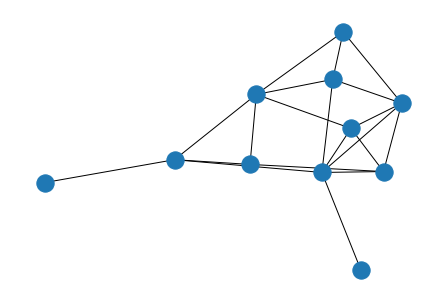

In [20]:
nx.draw(G)

In [21]:
routes = []
def expandedBFS(node, route):
    if node.islower() and node in route:
        return
    route.append(node)
    if route[-1] == "end":
        routes.append(route)
        return
    for x in G[node]:
        if not x == "start":
            expandedBFS(x, copy.deepcopy(route))

In [22]:
routes = []
expandedBFS("start", [])
len(routes)

5254